# Inroduction


This sample notebook demonstrates how to process live data streams using Pathway. The dataset used here is a subset of the one provided — specifically, it includes data for only a single parking spot. You are expected to implement your model across all parking spots.

Please note that the pricing model used in this notebook is a simple baseline. You are expected to design and implement a more advanced and effective model.


In [1]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

# Step 1: Importing and Preprocessing the Data

In [3]:
df = pd.read_csv('capstone_dataset.csv')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [4]:
lots=df['SystemCodeNumber'].unique()

In [5]:
lots

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [6]:
# Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index
df = df.sort_values('Timestamp').reset_index(drop=True)

In [7]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,2016-12-19 16:30:00


In [8]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay,Timestamp
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915,2016-11-11 10:22:39.283536640
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000,2016-10-04 07:59:00
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000,2016-10-24 09:48:45
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000,2016-11-11 11:43:30
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000,2016-11-29 13:36:15
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000,2016-12-19 16:30:00
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975,NaN


In [9]:
df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


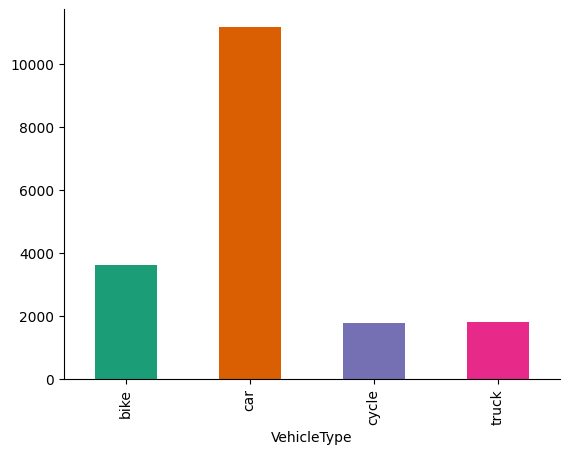

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('VehicleType').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
#cars are much more than others.

<Axes: xlabel='IsSpecialDay'>

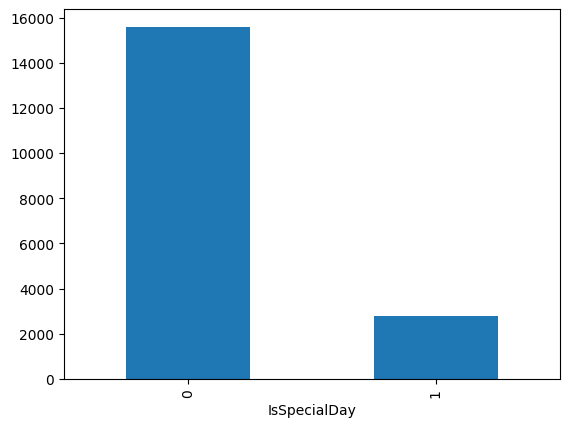

In [12]:
df.groupby('IsSpecialDay').size().plot(kind='bar')

In [13]:
# Save the selected columns to a CSV file for streaming or downstream processing
for lot in lots:
  df.loc[(df['SystemCodeNumber']==lot)][["Timestamp", "Occupancy", "Capacity"]].to_csv(f"parking_stream_{lot}.csv", index=False)


In [14]:
# Define the schema for the streaming data using Pathway
# This schema specifies the expected structure of each data row in the stream

class ParkingSchema(pw.Schema):
    Timestamp: str   # Timestamp of the observation (should ideally be in ISO format)
    Occupancy: int   # Number of occupied parking spots
    Capacity: int    # Total parking capacity at the location


In [15]:
#to use mathemaical functions.

import math
@pw.udf
def tanh(x: float) -> float:
    return math.tanh(x)

In [16]:
def Model1(data_with_time):
  delta_window = (
      data_with_time.windowby(
          pw.this.t,  # Event time column to use for windowing (parsed datetime)
          instance=pw.this.day,  # Logical partitioning key: one instance per calendar day
          window=pw.temporal.tumbling(datetime.timedelta(days=1)),  # Fixed-size daily window
          behavior=pw.temporal.exactly_once_behavior()  # Guarantees exactly-once processing semantics
      )
      .reduce(
          t=pw.this._pw_window_end,                        # Assign the end timestamp of each window
          occ_max=pw.reducers.max(pw.this.Occupancy),      # Highest occupancy observed in the window
          occ_min=pw.reducers.min(pw.this.Occupancy),      # Lowest occupancy observed in the window
          cap=pw.reducers.max(pw.this.Capacity),           # Maximum capacity observed (typically constant per spot)
      )
      .with_columns(
          # Pricing Formula:
          #     price = base_price + 5*tanh(demand_fluctuation)
          #     where:
          #         base_price = 10 (fixed minimum price)
          #         demand_fluctuation = (occ_max - occ_min) / cap
          #
          # Intuition:
          # - The greater the difference between peak and low occupancy in a day,
          #   the more volatile the demand is, indicating potential scarcity.
          # - Dividing by capacity normalizes the fluctuation (to stay in [0,1] range).
          # - apply tanh to make it non-linear , bounded and reduce volatility.
          # - and then added to the base price of 10 to set the final price.

          price = 10 + 5 * tanh(2 * ((pw.this.occ_max - pw.this.occ_min) / pw.this.cap))
      )
  )
  return delta_window

In [17]:
# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source,lot):
      # Create a Bokeh figure with datetime x-axis
      fig = bokeh.plotting.figure(
          height=400,
          width=800,
          title=f"Pathway: Daily Parking Price of {lot}",
          x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
      )
      # Plot a line graph showing how the price evolves over time
      fig.line("t", "price", source=source, line_width=2, color="navy")

      # Overlay red circles at each data point for better visibility
      fig.circle("t", "price", source=source, size=6, color="red")

      return fig

In [18]:
# Define the datetime format to parse the 'Timestamp' column
fmt = "%Y-%m-%d %H:%M:%S"

In [19]:
import datetime
from functools import partial
# Activate the Panel extension to enable interactive visualizations
pn.extension()
allviz=[]    #to store all imgs.

for lot in lots:
  data = pw.demo.replay_csv(f"parking_stream_{lot}.csv", schema=ParkingSchema, input_rate=100)

  data_with_time = data.with_columns(
      t = data.Timestamp.dt.strptime(fmt),
       day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
  )

  delta_window=Model1(data_with_time)

  plot_func=partial(price_plotter,lot=lot)
  viz = delta_window.plot(plot_func, sorting_col="t")
  allviz.append(pn.Column(viz))

In [26]:
pn.Column(*allviz).servable()

Column
    [0] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [1] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [2] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [3] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [4] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [5] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [6] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [7] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [8] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [9] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [10] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [11] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [12] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [13] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)

In [21]:
%%capture --no-display
pw.run()

Output()

In [22]:
for lot in lots:
  df.loc[(df['SystemCodeNumber']==lot)][['Timestamp','Occupancy','Capacity','QueueLength','IsSpecialDay','VehicleType','TrafficConditionNearby']].to_csv(f"parking_stream2_{lot}.csv",index=False)

In [23]:
class ParkingSchema2(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int
    QueueLength:int
    IsSpecialDay:int
    VehicleType:str
    TrafficConditionNearby:str

In [28]:
@pw.udf
def log1p_safe(x: float) -> float:
    return math.log1p(x)

In [29]:
def Model2(data_with_time2):
  delta_window = (
        data_with_time2.windowby(
            pw.this.t,
            instance=pw.this.day,
            window=pw.temporal.tumbling(datetime.timedelta(days=1)),
            behavior=pw.temporal.exactly_once_behavior()
        )
        .reduce(
        t=pw.this._pw_window_end,
        occ_sum=pw.reducers.sum(pw.this.Occupancy),
        occ_count=pw.reducers.count(pw.this.Occupancy),     #to calculate mean occ.
        cap=pw.reducers.max(pw.this.Capacity),

        Queuelength_sum=pw.reducers.sum(pw.this.QueueLength),
        Queuelength_count=pw.reducers.count(pw.this.QueueLength),   #to calculate mean QueueLength.

        SpecialDay=pw.reducers.max(pw.this.IsSpecialDay),

        # To calculate the ratio of all vehicles.
        num_truck=pw.reducers.sum(pw.if_else(pw.this.VehicleType == "truck", 1, 0)),
        num_car=pw.reducers.sum(pw.if_else(pw.this.VehicleType == "car", 1, 0)),
        num_bike=pw.reducers.sum(pw.if_else(pw.this.VehicleType == "bike", 1, 0)),
        num_cycle=pw.reducers.sum(pw.if_else(pw.this.VehicleType == "cycle", 1, 0)),
        total_vehicles=pw.reducers.count(pw.this.VehicleType),

        # To calculate the mean TrafficLevel.
        count_low=pw.reducers.sum(pw.if_else(pw.this.TrafficConditionNearby == "low", 1, 0)),   #
        count_avg=pw.reducers.sum(pw.if_else(pw.this.TrafficConditionNearby == "average", 1, 0)),
        count_high=pw.reducers.sum(pw.if_else(pw.this.TrafficConditionNearby == "high", 1, 0)),
        total=pw.reducers.count(pw.this.TrafficConditionNearby),
      )
        # Intermediate columns
        .with_columns(
            occ_mean = pw.this.occ_sum / (pw.this.occ_count + 1e-6),
            queue_ratio = log1p_safe(pw.this.Queuelength_sum / (pw.this.Queuelength_count + 1e-6)),     # log(1 + x) dampens large values.

            #Calculating the ratio of all vehicles.
            truck_ratio = pw.this.num_truck / (pw.this.total_vehicles + 1e-6),
            car_ratio = pw.this.num_car / (pw.this.total_vehicles + 1e-6),
            bike_ratio = pw.this.num_bike / (pw.this.total_vehicles + 1e-6),
            cycle_ratio = pw.this.num_cycle / (pw.this.total_vehicles + 1e-6),

            #calculating traffic level ratio.
            ratio_low = pw.this.count_low / (pw.this.total + 1e-6),
            ratio_avg = pw.this.count_avg / (pw.this.total + 1e-6),
            ratio_high = pw.this.count_high / (pw.this.total + 1e-6),
        )
        # VehicleWeight and traffic
        .with_columns(
            #calculating Vehicle weight
            VehicleWeight = (
                0.5 * pw.this.truck_ratio +
                0.3 * pw.this.car_ratio +
                0.2 * pw.this.bike_ratio +
                0.1 * pw.this.cycle_ratio
            ),
            #calculating traffic level.
            traffic = (
                0.5 * pw.this.ratio_high +
                0.3 * pw.this.ratio_avg +
                0.1 * pw.this.ratio_low
            )
        )
        # Demand
        .with_columns(
            Demand = (
                0.4 * (pw.this.occ_mean / (pw.this.cap + 1e-6)) +
                0.3 * pw.this.queue_ratio -
                0.2 * pw.this.traffic +
                0.3 * pw.this.SpecialDay +
                0.15 * pw.this.VehicleWeight
            ),
        )
        # Final price based on demand
        .with_columns(
            price = 10*(1 + 0.5*tanh(pw.this.Demand))

            #using tanh becuase-
            #Keeps large fluctuations under control
            #Diminishes the impact of spikes
            # handle non linearity
            #Best for stable, reliable pricing
        )
    )
  return delta_window

In [30]:
# Activate the Panel extension to enable interactive visualizations
pn.extension()

allviz2=[]
for lot in lots:
  data2 = pw.demo.replay_csv(f"parking_stream2_{lot}.csv", schema=ParkingSchema2, input_rate=1000)
  data_with_time2 = data2.with_columns(
    t = data2.Timestamp.dt.strptime(fmt),
    day = data2.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
  )

  delta_window2=Model2(data_with_time2)

  plot_func=partial(price_plotter,lot=lot)
  viz = delta_window2.plot(plot_func, sorting_col="t")
  allviz2.append(pn.Column(viz))


In [31]:
pn.Column(*allviz2).servable()

Column
    [0] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [1] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [2] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [3] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [4] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [5] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [6] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [7] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [8] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [9] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [10] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [11] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [12] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [13] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)

In [32]:
%%capture --no-display
pw.run()

Output()

In [33]:
#Graphs showing seasonality according to the Special days.